# Ernesto Quevedo and Alejandro Rodriguez

In [1]:
# Quantum circuits, strings and Parametrisation Example 7

In [3]:
from lambeq import BobcatParser

## Our first modification was to change the size of the sentence:

In [57]:
sentence = 'If you come home I cooked you beef'

In [58]:
parser = BobcatParser(verbose='text')
diagram = parser.sentence2diagram(sentence)

In [59]:
from lambeq import AtomicType, IQPAnsatz

In [62]:
N = AtomicType.NOUN
S = AtomicType.SENTENCE

## We modify the number of layers to 3 and we try other numbers too and detected that what happens is that increase or decrease the number of R_z rotations corresponding to some words, which is more appreciable in the case of words like 'come' and 'home'

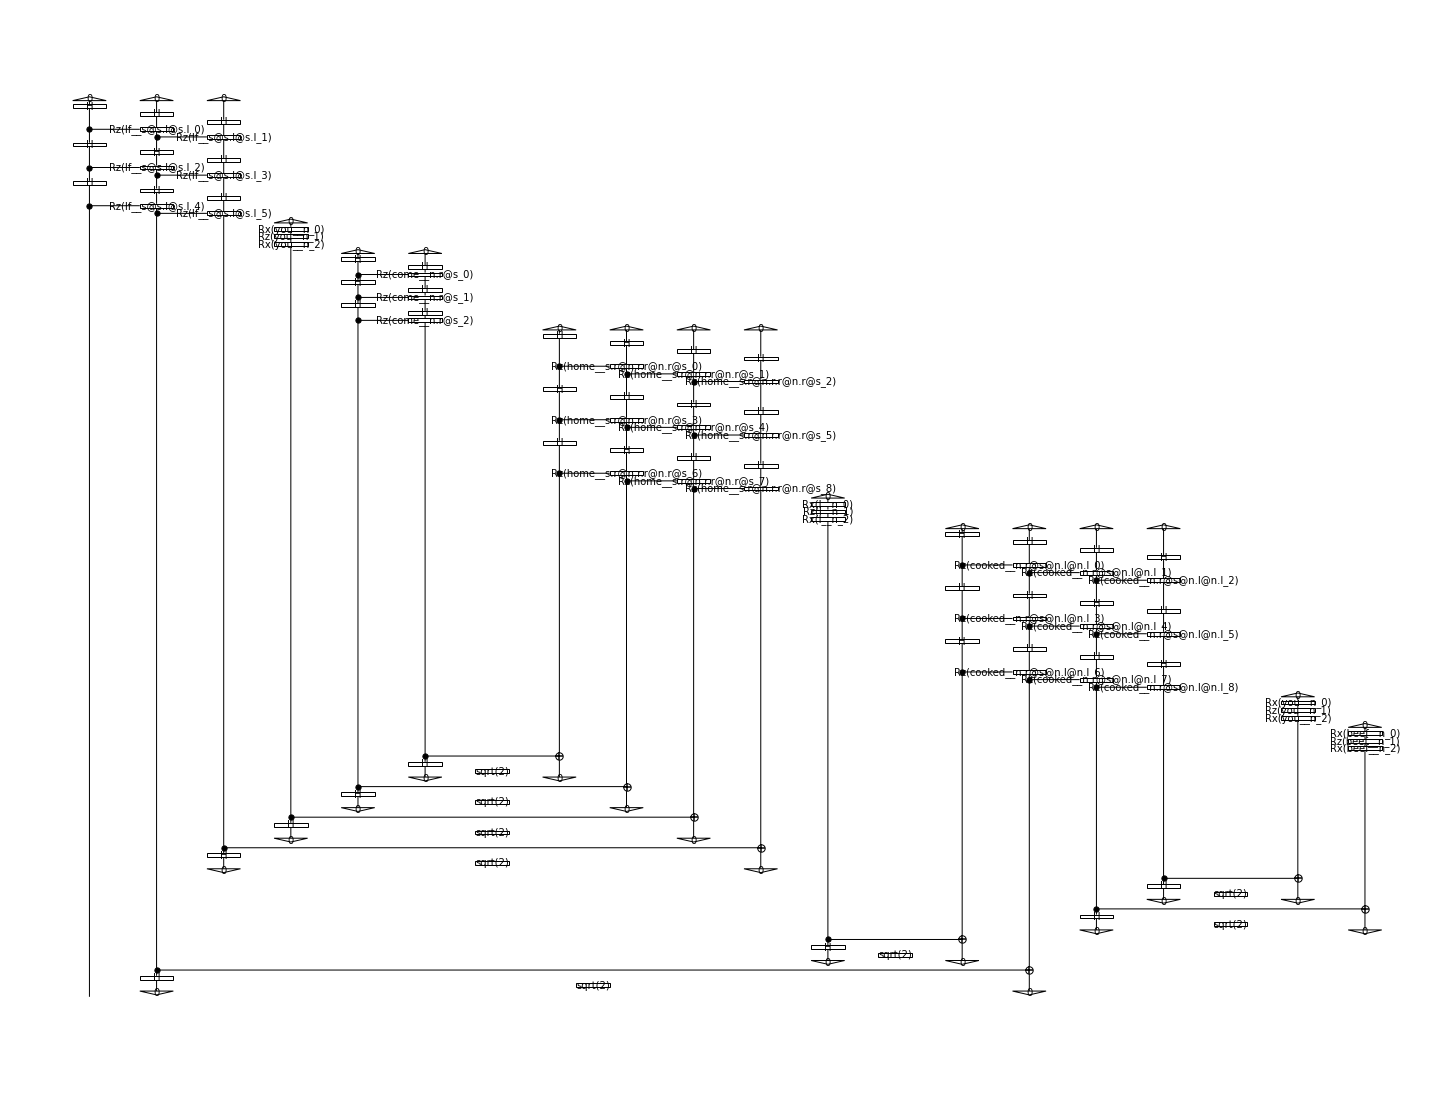

In [69]:
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=3)
discopy_circuit = ansatz(diagram)
discopy_circuit.draw(figsize=(20,15))

In [46]:
from pytket.circuit.display import render_circuit_jupyter

In [47]:
tket_circuit = discopy_circuit.to_tk()

## Since we change the sentence and now it has 8 words, we detected that the next circuit change to have 17 work qbits and 16 control qbits. It seems related to the double of the size of the sentence in words. 

In [70]:
render_circuit_jupyter(tket_circuit) 

Exporting to pytket format provides additional functionality and allows interoperability. For example, obtaining a qiskit circuit is trivial:

In [ ]:
from pytket.extensions.qiskit import tk_to_qiskit

In [ ]:
qiskit_circuit = tk_to_qiskit(tket_circuit)

In [ ]:
qiskit_circuit.draw()

## Here we change the values of the Dim of N to 7 and the Dim of S to 4. However, we detected that it only changes the number that represents N and the number that represents S. Where N corresponds to a noun and S to a sentence according to the documentation.

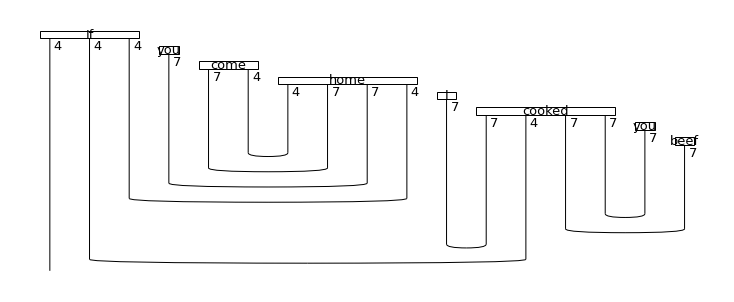

In [76]:
from lambeq import TensorAnsatz
from discopy import Dim

tensor_ansatz = TensorAnsatz({N: Dim(7), S: Dim(4)})
tensor_diagram = tensor_ansatz(diagram)

tensor_diagram.draw(figsize=(10,4), fontsize=13)

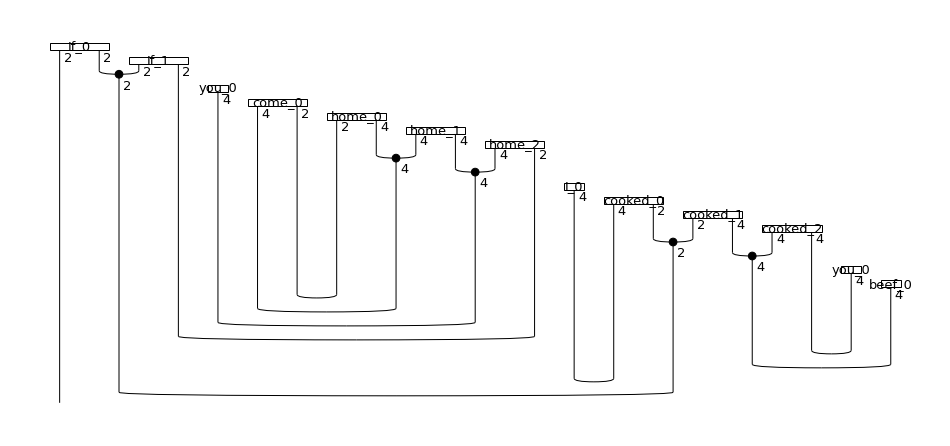

In [55]:
from lambeq import SpiderAnsatz
from discopy import Dim

spider_ansatz = SpiderAnsatz({N: Dim(4), S: Dim(2)})
spider_diagram = spider_ansatz(diagram)
spider_diagram.draw(figsize=(13,6), fontsize=13)

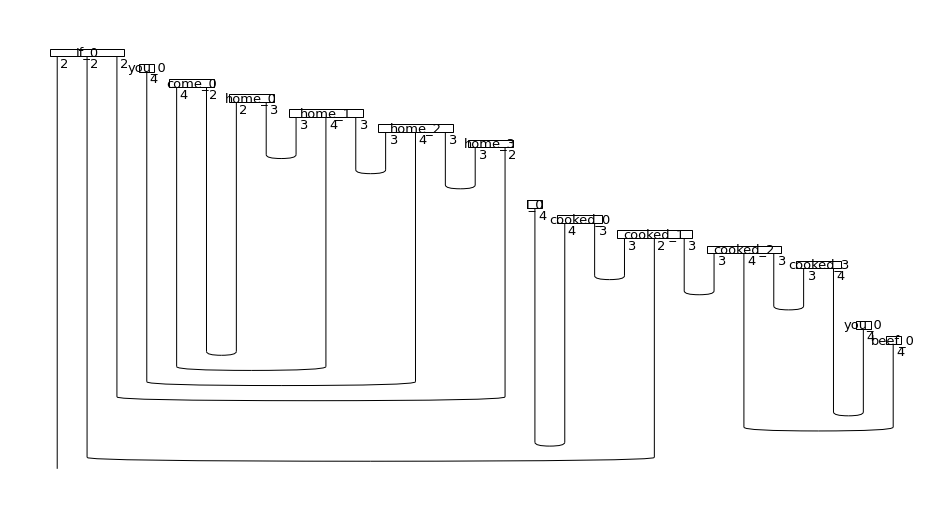

In [56]:
from lambeq import MPSAnsatz
from discopy import Dim

mps_ansatz = MPSAnsatz({N: Dim(4), S: Dim(2)}, bond_dim=3)
mps_diagram = mps_ansatz(diagram)
mps_diagram.draw(figsize=(13,7), fontsize=13)

# Package versions

In [26]:
from platform import python_version
import pytket
import qiskit

print("python version: ", python_version())
print("pytket version: ", pytket.__version__)
print("qiskit version: ", qiskit.__version__)

python version:  3.8.13
pytket version:  1.1.0
qiskit version:  0.20.1
